In [6]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

The goal of this exercise is to learn to fit a logistic regression on simple examples and to understand how the algorithm separates data from the different classes.

#### 1 dimension

First, we will start as usual with feature data in 1 dimension. Use `make_classification` from Scikit-learn to generate 100 data points:

```python
X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)
```

_Warning: The shape of X is not the same as the shape of y. You may need (for some questions) to reshape X using: `X.reshape(1,-1)[0]`._



In [4]:
X,y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

1. Plot the data using a scatter plot. The x-axis contains the feature and the y-axis contains the target.

The plot should look like this:

![ex3q1](./w2_day2_ex3_q1.png)

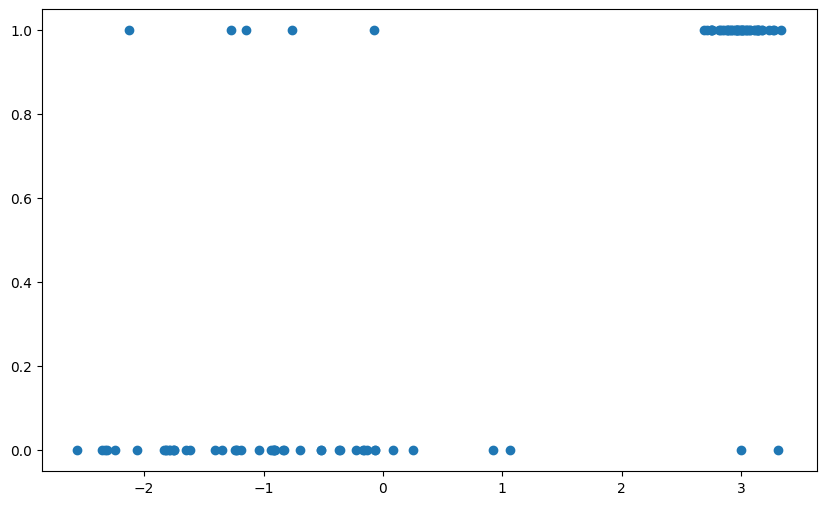

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X.reshape(1,-1)[0], y)
plt.show()

2. Fit a Logistic Regression on the generated data using scikit-learn. Print the coefficients and the interception of the Logistic Regression.

In [32]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)
print(clf.coef_[0][0])
print(clf.intercept_[0])

1.1888576492596898
-0.9849751641324811


3. Add to the previous plot the fitted sigmoid and the 0.5 probability line. The plot should look like this:

![ex3q3](./w2_day2_ex3_q3.png)

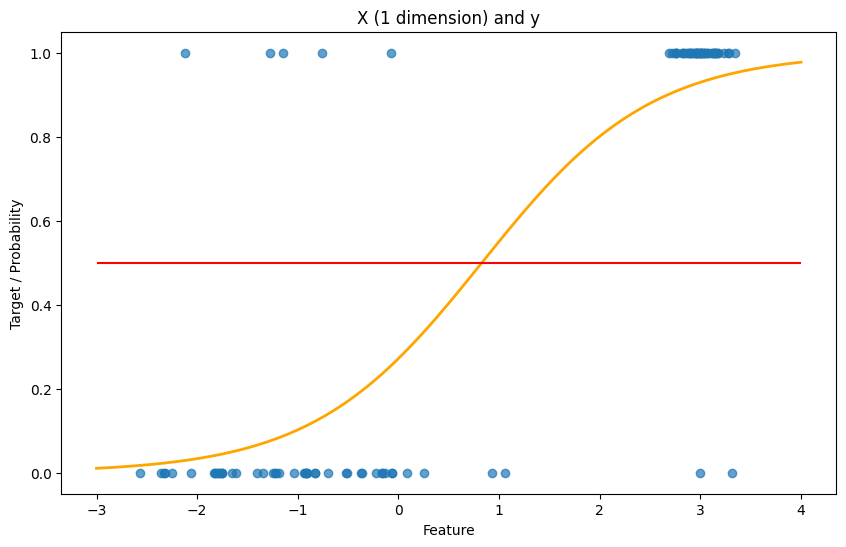

In [44]:
X_reshaped = X.reshape(1, -1)[0]


X_range = np.linspace(-3, 4, 300).reshape(-1, 1)

y_curve = clf.predict_proba(X_range)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_reshaped, y, alpha=0.7, label='Data Points') # The dots
plt.plot(X_range, y_curve, color='orange', linewidth=2, label='Logistic Curve') # The curve
plt.hlines(0.5, -3, 4, colors='red', linestyles='solid')

plt.title('X (1 dimension) and y')
plt.xlabel('Feature')
plt.ylabel('y')
plt.show()

4.  Create a function `predict_probability` that takes as input the data point and the coefficients and that returns the predicted probability. As a reminder, the probability is given by: `p(x) = 1/(1+ exp(-(coef*x + intercept)))`. Check you have the same results as the method `predict_proba` from Scikit-learn.

```python
def predict_probability(coefs, X):
    '''
    coefs is a list that contains a and b: [coef, intercept]
    X is the features set

    Returns probability of X
    '''
    #TODO
    probabilities =

    return probabilities
```

5. Create a function `predict_class` that takes as input the data point and the coefficients and that returns the predicted class. Check you have the same results as the class method `predict` output on the same data.


6. On the plot add the predicted class. The plot should look like this (the predicted class is shifted a bit to make the plot more understandable, but obviously the predicted class is 0 or 1, not 0.1 or 0.9)
   The plot should look like this:

![ex3q6](./w2_day2_ex3_q5.png)

#### 2 dimensions

Now, let us repeat this process on 2-dimensional data. The goal is to focus on the decision boundary and to understand how the Logistic Regression creates a line that separates the data. The code to plot the decision boundary is provided, however it is important to understand the way it works.

- Generate 500 data points using:

```python
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)
```


7. Fit the Logistic Regression on X and y and use the code below to plot the fitted sigmoid on the data set.

The plot should look like this:

![ex3q7](./w2_day2_ex3_q6.png)

```python
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
#if needed change the line below
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

```

The plot should look like this:

- [Plot](https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression)